# Titanic: Machine Learning from Disaster

### Goal:
#### It is my job to predict if a passenger survived the sinking of the Titanic or not. 
#### For each in the test set, predict a 0 or 1 value for the variable.

In [232]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
df = data_train.append(data_test)  # load the data

C:\Users\16708\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [233]:
df.info() # show the basic information of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


##### We can see there are missing values in feature Age,Cabin,Embarked,Fare, too many missing values for Cabin

In [234]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_list = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for n,i in enumerate(feature_list):  
    Cabin = df[i].value_counts().index.shape[0]
    print('{0}. the count of feature {1} is {2}'.format(n+1,i,Cabin)) # number of types for each feature

1. the count of feature Pclass is 3
2. the count of feature Name is 1307
3. the count of feature Sex is 2
4. the count of feature SibSp is 7
5. the count of feature Embarked is 3
6. the count of feature Parch is 8
7. the count of feature Ticket is 929
8. the count of feature Cabin is 186


##### Therefore, we can first visualize Pclass, Sex , Sibsp, Embarked, Parch to anylyse their data.

## I. Visualization

### 1. General anylysis

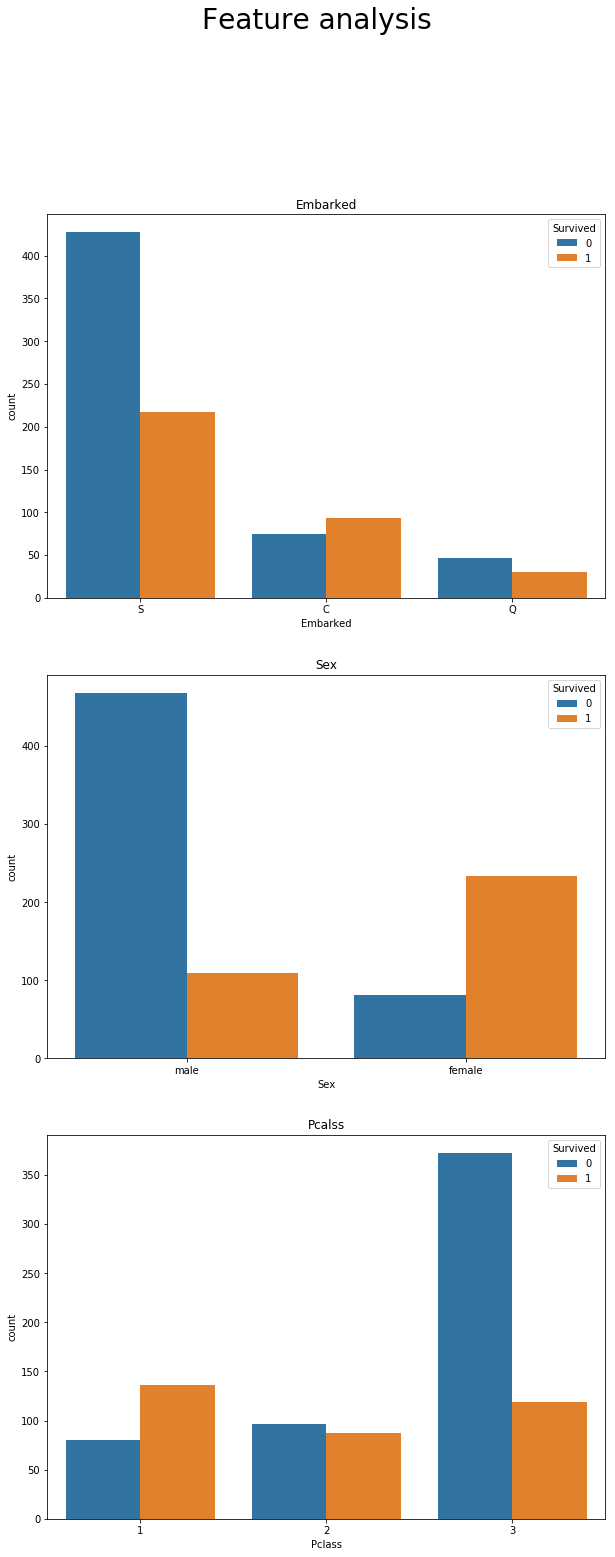

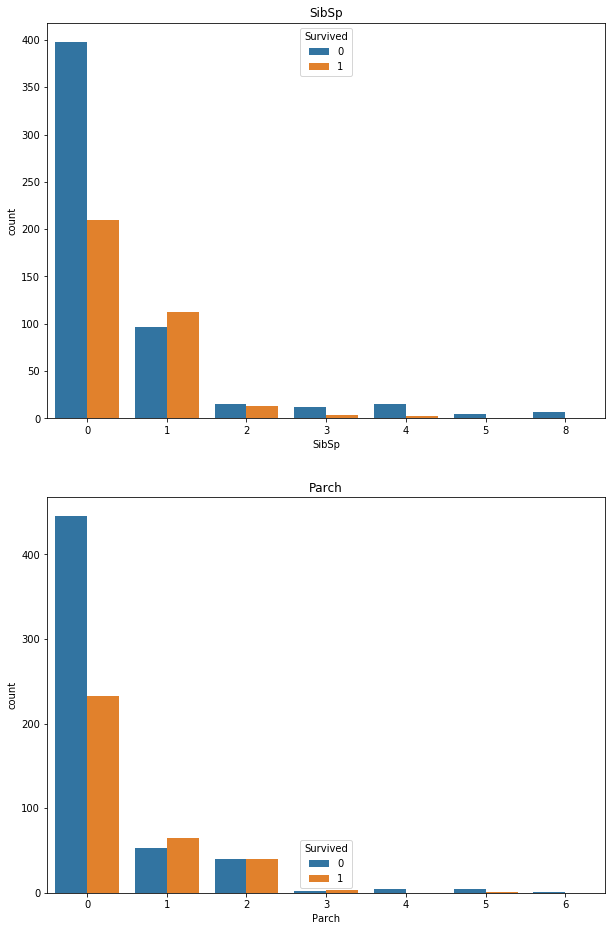

In [236]:
%matplotlib inline
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(10,24))
sns.countplot(x='Embarked', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Sex', hue='Survived', data=data_train, ax=ax2)
sns.countplot(x='Pclass', hue='Survived', data=data_train, ax=ax3)
ax1.set_title('Embarked')
ax2.set_title('Sex')
ax3.set_title('Pcalss')
f.suptitle('Feature analysis',size=28,y=1)
f, [ax1,ax2] = plt.subplots(2,1,figsize=(10,16))
sns.countplot(x='SibSp', hue='Survived', data=data_train, ax=ax1)
sns.countplot(x='Parch', hue='Survived', data=data_train, ax=ax2)
ax1.set_title('SibSp')
ax2.set_title('Parch')
plt.show()

##### Sex: There are much more male than female aborad but female has a higher survival rate. This corresponds to the princple that women are first to be rescued.
##### Pclass: Most people are in class 3,but they are less likely to be rescued. It makes sense because people with higher social value should be rescued first.
##### Embarked: Most people embarked at S，but they are less likely to be rescued. People from C have higher possibility to be rescued. Thus, we can speculate the port is related to Pclass.
##### SibSp and Parch: Their plots look very similar, maybe we can combine them together later.

##### From the five features above, we can see Sex and Pclass have the most significant impact on the result.

C:\Users\16708\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\16708\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


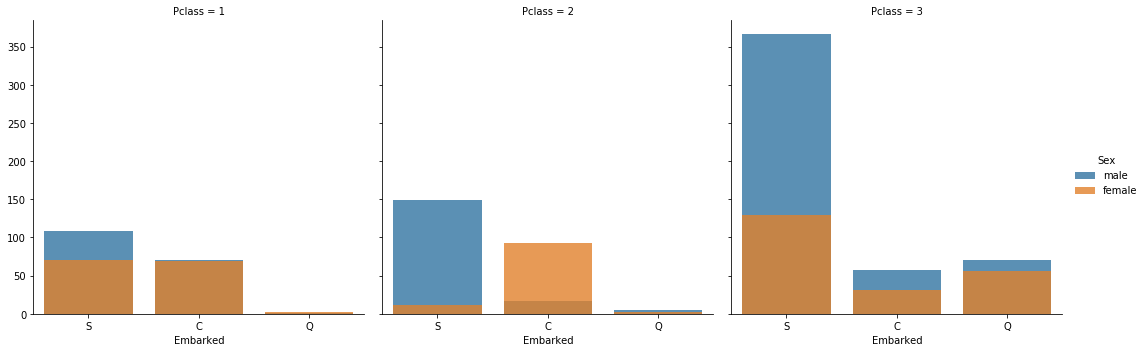

In [237]:
# find the relation between sex, embarked port and social class.
img = sns.FacetGrid(df,col='Pclass', hue='Sex', size=5)
img.map(sns.countplot, 'Embarked', alpha=0.8)
img.add_legend()

C:\Users\16708\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\16708\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


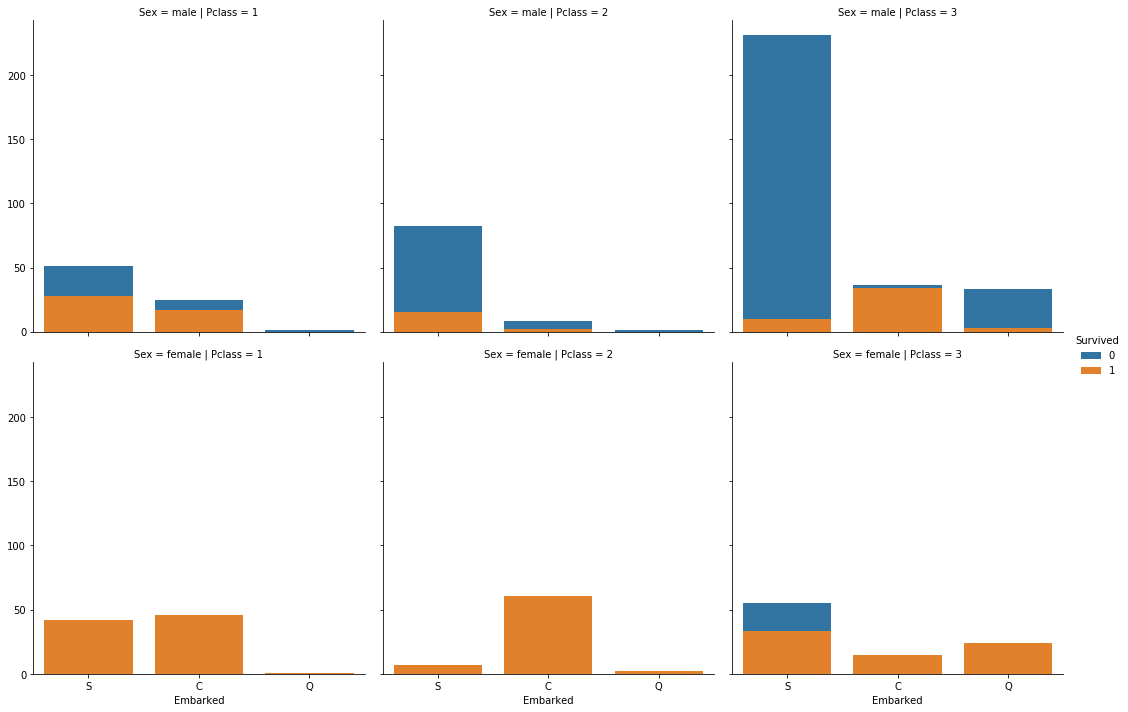

In [238]:
img2 = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived', size=5)
img2.map(sns.countplot, 'Embarked', alpha=1)
img2.add_legend()

##### When class is 1 and 2, very few people embarked from Q. However,  more class 3 people embarked from Q than C. It shows that class is related  to port. We can infer that S and C are superior port while Q is inferior port.
##### Notice that in class 2, male mostly embarked from S while female mostly embarked from Q. What's more, the possibilty of survival in people in class 2 from C is much higher. We can infer that class 2 people who embarked from C are likely to be female and have higher possibility to survive. 

### 2.Age ananysis

C:\Users\16708\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\16708\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\16708\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

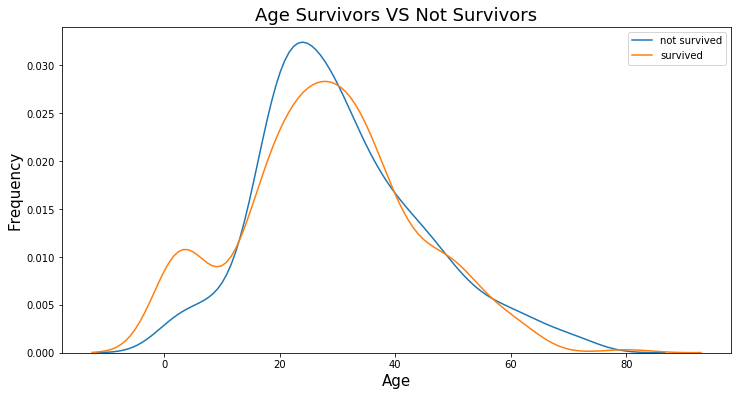

In [239]:
# find the relation between age and survival
f,ax = plt.subplots(figsize=(12,6))
sns.kdeplot(data_train.loc[(data_train['Survived'] == 0),'Age'] , label='not survived')
sns.kdeplot(data_train.loc[(data_train['Survived'] == 1),'Age'] ,label='survived')
plt.title('Age Survivors VS Not Survivors', fontsize = 18)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

##### We can see children aged 0 -15 have higher possibility to survive while there is no such difference in people aged over 15 
##### This also corresponds to the princple that women and children are first to be rescued.

C:\Users\16708\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


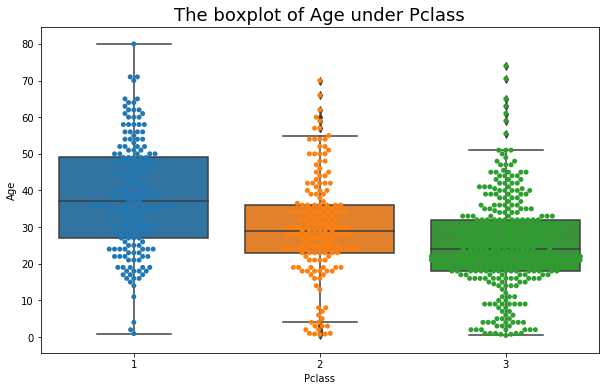

In [240]:
# boxplot aynalysis
fig, ax1 = plt.subplots(1,figsize=(10,6))
sns.boxplot(x="Pclass", y="Age", data=data_train)
sns.swarmplot(x="Pclass", y="Age", data=data_train)
ax1.set_title('The boxplot of Age under Pclass', fontsize = 18)
fig.show()

##### We can see that the median of age in each class is Class1>Class2>Class3
##### It makes sense because people in class1 are mostly successful people with higher social status while young people can only afford class3. 

C:\Users\16708\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


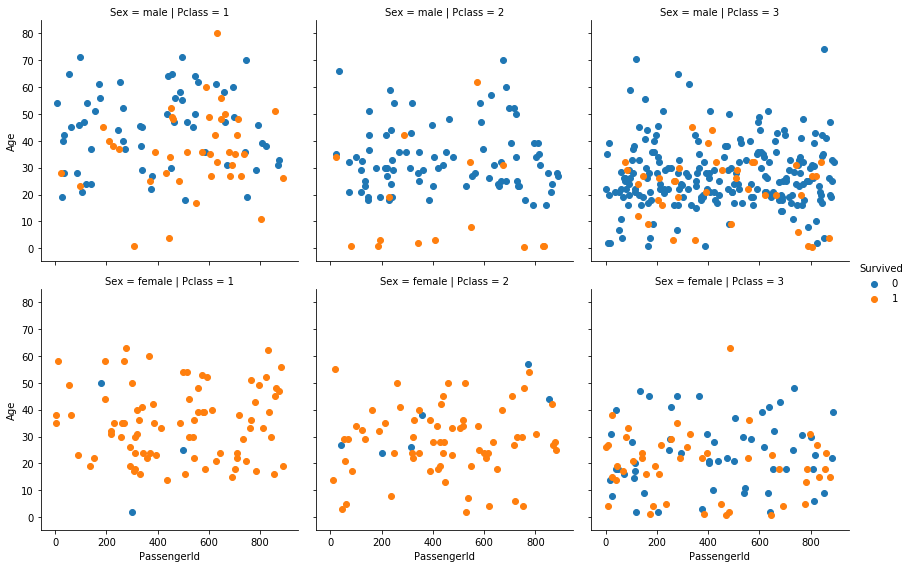

In [241]:
img3 = sns.FacetGrid(data_train, row='Sex', col='Pclass', hue='Survived',  size=4)
img3.map(plt.scatter, 'PassengerId', 'Age')
img3.add_legend()

##### Nearly every female in class1 and class2 survived. Male in class 1 survived most and all children under 10 in class 2 survived.

### 3. Fare anylysis

C:\Users\16708\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


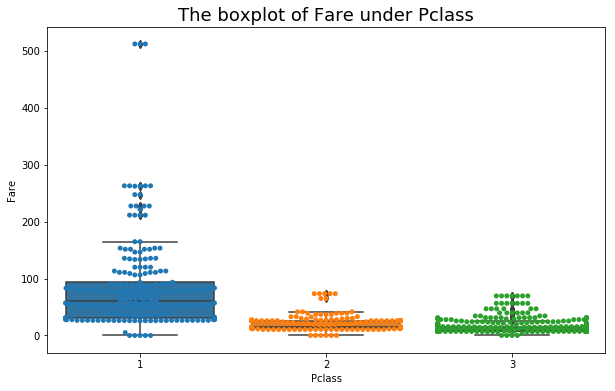

In [242]:
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
sns.boxplot(x="Pclass", y="Fare", data=data_train)
sns.swarmplot(x="Pclass", y="Fare", data=data_train)
ax1.set_title('The boxplot of Fare under Pclass', fontsize = 18)
fig.show()

##### Let's take a look at the abnormal data

In [243]:
df.loc[df['Fare']>500]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755
343,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755


##### We can infer that these two Cardeza are couples. So we'd better treat them carefully as special data.

## II. Processing data

#### Fristly, i will try to add the missing data.

In [244]:
df[df['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


##### This man is aged 60 and in class 3, we can search for other men with the same features

In [245]:
df.loc[(df['Pclass']==3)&(df['Age']>60)&(df['Sex']=='male')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
116,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,0.0,370369
280,65.0,NaN,Q,7.7500,"Duane, Mr. Frank",0,281,3,male,0,0.0,336439
326,61.0,NaN,S,6.2375,"Nysveen, Mr. Johan Hansen",0,327,3,male,0,0.0,345364
851,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0.0,347060
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


##### We can simply choose the avarage fare to fill in the missing data.

In [246]:
df.loc[(df['PassengerId']==1044),"Fare"] = 7.378

In [247]:
df.loc[(df['PassengerId']==1044)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,7.378,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [248]:
df[df['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


##### From the anylysis we made before, female from class 1 mostly embarked from port C. So we just choose C.

In [249]:
df['Embarked'] = df['Embarked'].fillna('C')

#### Next, we will invent new features based on the analysis above.

In [250]:
def person(passenger):
    age, sex = passenger
    if (age < 18):
        return 'child'
    elif (sex == 'female'):
        return 'female_adult'
    else:
        return 'male_adult'

In [251]:
df = pd.concat([df, pd.DataFrame(df[['Age', 'Sex']].apply(person, axis=1), columns=['person'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['person'])],axis=1)

#### Finally, we have to fit in the missing Age data. Here we use ExtraTreesRegressor from RandomForest.

In [252]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
classers = ['Fare','Parch','Pclass','SibSp']
ETR = ExtraTreesRegressor(n_estimators=200,random_state=0)
X_train = df[classers][df['Age'].notnull()]
Y_train = df['Age'][df['Age'].notnull()]
X_test = df[classers][df['Age'].isnull()]
ETR.fit(X_train.as_matrix(),np.ravel(Y_train))
preds = ETR.predict(X_test.as_matrix())
df.loc[(df['Age'].isnull()),"Age"] = preds

C:\Users\16708\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\16708\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


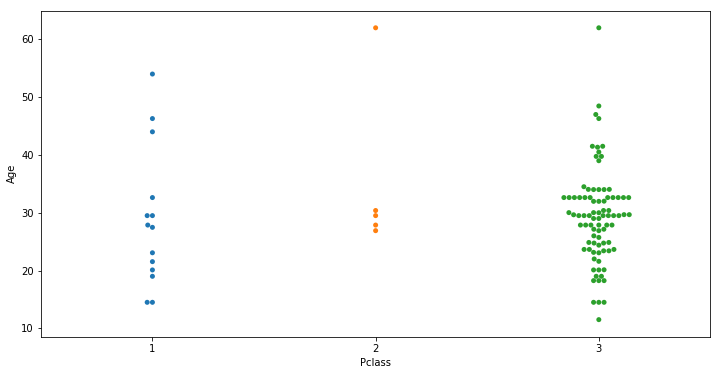

In [253]:
X_test['Age'] = pd.Series(preds)
f,ax=plt.subplots(figsize=(12,6))
sns.swarmplot(x='Pclass',y='Age',data=X_test)
plt.show()
# looks good

## III.Modeling and predicting

##### It's a supervised classification problem, so we use RandomForest model to train the data

In [256]:
from sklearn import cross_validation
rfc = RandomForestClassifier(n_estimators=3500, min_samples_split=4, class_weight={0:0.745,1:0.255})
kf = cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(rfc, train[features], target, cv=kf)
print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std()*100, 'RFC Cross Validation'))

Accuracy: 78.227 (+/- 0.57) [RFC Cross Validation]


##### The accuracy is 78.227 which ranks top 40% in kaggle leaderboard :)

## IIII.Conclusion

##### Since it is the first time i make a machine learning project and the schedule is short, I do not think carefully about every part. A lot of  codes need to be improved. I do not add feature "Cabin" into consideration and new features are far from enough to train the data perfectly. Besides, I do not completely compare random forest with other methods. I will improve this project after this course.